# I/O with Scenes

Φ<sub>Flow</sub> comes with a couple of I/O functions to store fields, such as `CenteredGrid` or `StaggeredGrid`.
These are stored according to the [scene format specification](https://tum-pbs.github.io/PhiFlow/Scene_Format_Specification.html) which is designed to store sequences.

In [1]:
from phi.flow import *

## Writing Data

A scene stores one sequence of data. Batched data can also be stored in a single scene (see below).
To create a new scene, we pass the directory and name. An index suffix is automatically appended to the name.

In [2]:
scene = Scene.create('./data', name='sim')
scene

./data\sim_000000

We can list all scenes in the directory.

In [3]:
Scene.list('./data')

(./data\sim_000000,)

Let's write some data to the scene.
Here, we sample random values on a grid according to a `smoothness` parameter, which we also want to store.

<Figure size 864x360 with 2 Axes>

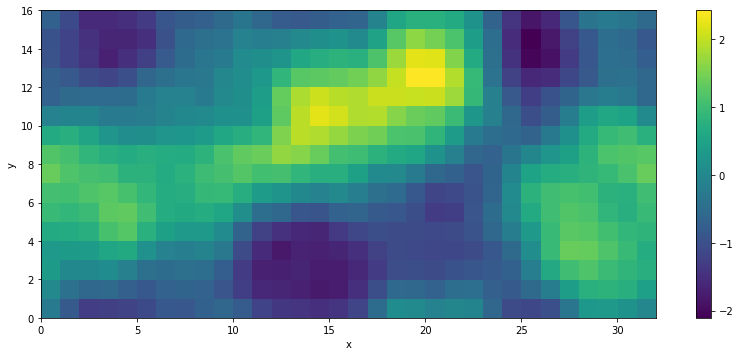

In [4]:
smoothness = math.random_uniform()
data = CenteredGrid(Noise(smoothness=smoothness + 0.5), x=32, y=16)
plot(data)

Fields can be stored using the `write` method, which creates a new file with the given name and frame index, in this case `random_noise_data_000000.npz`.

Additional non-field values, like the smoothness, can be added as properties. Any JSON-serializable object can be stored this way.

In [5]:
scene.write(noise_data=data, frame=0)
scene.put_properties(smoothness=smoothness)

## Reading Data

Next, let's read the data back from disk. We can reference our scene using `Scene.list` or `Scene.at`.

In [6]:
scene = Scene.at('./data', 0)

The properties of the scene are stored as a `dict` in `scene.properties`.

In [7]:
scene.properties

{'smoothness': 0.7946394681930542}

Fields can be read using [`Scene.read`](https://tum-pbs.github.io/PhiFlow/phi/field/#phi.field.Scene.read) given their name and frame index.

<Figure size 864x360 with 2 Axes>

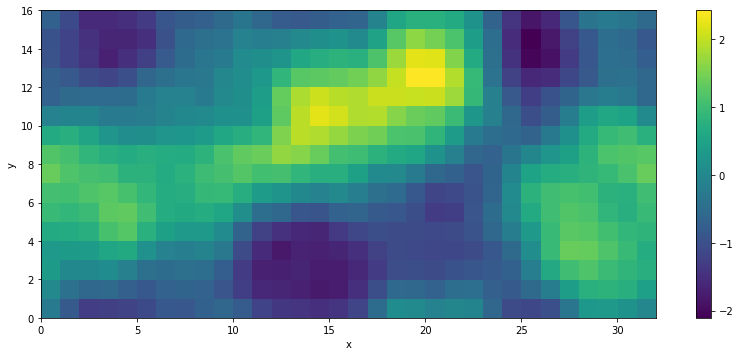

In [8]:
plot(scene.read('noise_data', frame=0))

## Batched Data

Scenes can also deal with batched data.
When batched data is written to a single scene, only one file is created for each stored field.

<Figure size 864x360 with 4 Axes>

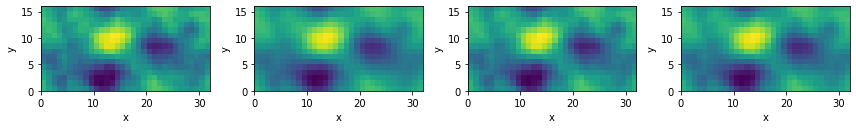

In [9]:
batched_smoothness = math.random_uniform(batch(batch=4))
batched_data = CenteredGrid(Noise(smoothness=batched_smoothness + 0.5), x=32, y=16)
plot(batched_data, show_color_bar=False)

In [10]:
scene.write(batched_noise_data=batched_data, frame=0)
scene.put_properties(smoothness=batched_smoothness)

<Figure size 864x360 with 4 Axes>

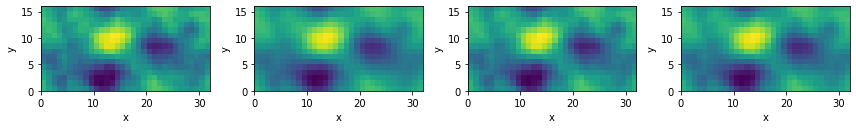

In [11]:
scene = Scene.at('./data', 0)
plot(scene.read('batched_noise_data'), show_color_bar=False)

In [12]:
scene.properties['smoothness']

(0.649, 0.992, 0.729, 0.875) along batchᵇ float64

Scenes themselves can also be batched.
In that case, a single `Scene` object represents a batch of actual directories.
When writing data to the batched scene, the data are sliced along the dimensions of the scene.

In [13]:
scene_batch = Scene.create('./data', batch(batch=4), name='sim')
scene_batch

(./data\sim_000001, ./data\sim_000002, ./data\sim_000003, ./data\sim_000004) along batchᵇ

In [14]:
scene_batch.write(batched_noise_data=batched_data, frame=0)
scene_batch.put_properties(smoothness=batched_smoothness)

Now, let's look at the contents of a single scene.

In [15]:
scene = Scene.at('./data', 1)
scene.properties['smoothness']

0.6488508582115173

<Figure size 864x360 with 2 Axes>

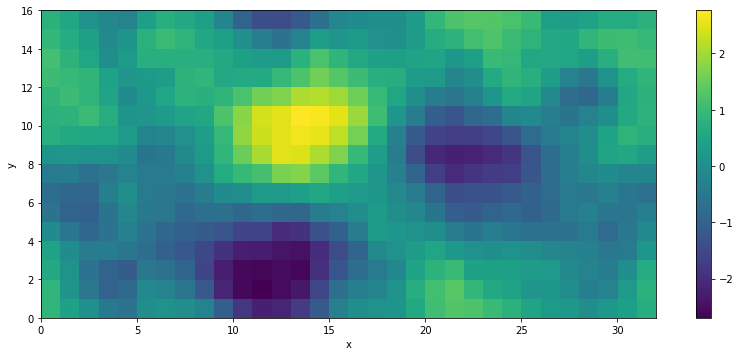

In [16]:
plot(scene.read('batched_noise_data'))

If the scene has batch dimensions that are not present on the data, the data are tiled automatically, i.e. stored redundantly across the scenes.